In [104]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('final.csv')
out_of_sample = pd.read_csv('Out_of_Sample.csv')

In [105]:
x = df.loc[:,'Visitor-Points':'elo_diff'].values
print(x.shape)

(5967, 136)


In [106]:
y = df.loc[:,['score_gap_sign']].values

In [7]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=1/7.0, random_state=0)

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(train_x)
train_x = scaler.transform(train_x)
test_x = scaler.transform(test_x)

In [9]:
train_y = train_y.ravel()

In [31]:
train_x

array([[ 0.90613985,  0.11429687, -0.23006356, ..., -1.32578823,
        -1.97175916,  0.58571177],
       [-0.16479077, -0.97418392, -0.23006356, ...,  0.74729292,
        -1.05902622, -1.67268033],
       [ 0.65900201,  0.19802616, -0.23006356, ...,  0.26357399,
        -0.06138789, -0.12912822],
       ...,
       [-0.32954933, -0.13689101, -0.23006356, ...,  0.53998481,
        -1.65336395, -0.48516784],
       [ 0.16472634,  0.44921403, -0.23006356, ..., -1.46399365,
        -1.03779987, -0.15934184],
       [ 0.49424346,  0.95158978, -0.23006356, ...,  0.33267669,
         1.42445643,  0.31836969]])

In [39]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV

def svc_param_selection(X, y, nfolds):
    Cs = [0.01, 0.1, 1]
    gammas = [0.001, 0.01, 0.1, 1]
    param_grid = {'C': Cs, 'gamma' : gammas}
    grid_search = GridSearchCV(svm.SVR(kernel='rbf'), param_grid, cv=nfolds)
    grid_search.fit(X, y)
    grid_search.best_params_
    return grid_search.best_params_

svc_param_selection(train_x, train_y, 5)

{'C': 1, 'gamma': 0.01}

In [100]:
from sklearn.svm import SVR
svregress = SVR(kernel='rbf', C=1, gamma=0.001)
svregress.fit(train_x, train_y)  

SVR(C=1, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.001,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [101]:
pred = svregress.predict(test_x)

In [102]:
import numpy as np
from sklearn.metrics import mean_squared_error

error = np.sqrt(mean_squared_error(test_y, pred))
print(error)

9.184228457225801


In [107]:
# out-of-sample prediction
y = y.ravel()
X_out = out_of_sample.drop(['score_gap_sign'], axis = 1)
y_out = out_of_sample['score_gap_sign']
scaler = StandardScaler()
scaler.fit(x)
x = scaler.transform(x)
X_out = scaler.transform(X_out)

svregress = SVR(kernel='rbf', C=1, gamma=0.001)
svregress.fit(x,y)
pred = svregress.predict(X_out)
error = np.sqrt(mean_squared_error(y_out, pred))
print(error)

9.70559234908929


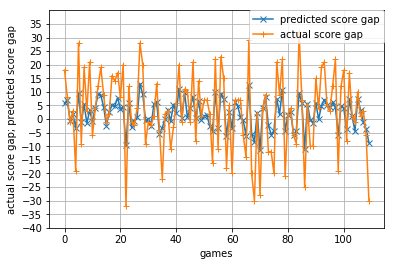

In [108]:
# Visulization of prediction 
import matplotlib.pyplot as plt
pred_list = list(pred)
y_out_list = list(y_out)
fig, ax = plt.subplots()
plt.xlabel('games')
plt.ylabel('actual score gap; predicted score gap')
yticks = range(-40,40,5)
ax.set_yticks(yticks)
ax.set_ylim([-40,40])
x = list(range(len(out_of_sample)))
plt.plot(x,pred_list,"x-",label="predicted score gap")
plt.plot(x,y_out_list,"+-",label="actual score gap")
plt.grid(True)
plt.legend(bbox_to_anchor=(1.0, 1), loc=1, borderaxespad=0.)

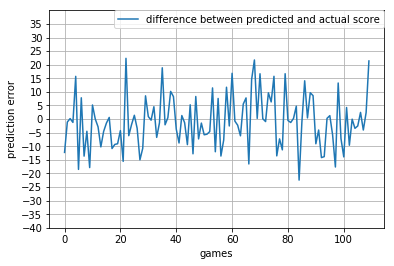

In [109]:
# Visulization of prediction 
import matplotlib.pyplot as plt
pred_list = list(pred)
y_out_list = list(y_out)
pred_actual_diff = [pred[i] - y_out[i] for i in range(len(pred))]
pred_actual_diff = [float(x) for x in pred_actual_diff]
fig, ax = plt.subplots()
plt.xlabel('games')
plt.ylabel('prediction error')
yticks = range(-40,40,5)
ax.set_yticks(yticks)
ax.set_ylim([-40,40])
x = list(range(len(out_of_sample)))
plt.plot(x, pred_actual_diff, label="difference between predicted and actual score")
plt.grid(True)
plt.legend(bbox_to_anchor=(1.0, 1), loc=1, borderaxespad=0.)